# Coding Block 4 - Automated model and hyperparameter tuning with AutoGluon

### Load the packages

In [ ]:
#!pip install autogluon.tabular  > /dev/null 2>&1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# AutoML
from autogluon.tabular import TabularPredictor
'''
...
'''

### Read the dataset 
You can also compare processed and non-processed data. The autogluon library will do some preprocessing as well.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# 📌 Lade den Diabetes-Datensatz
file_path = "../data/diabetes.csv"  # Pfad anpassen
df = pd.read_csv(file_path)

# 📌 Definiere die Zielvariable
label = "Outcome"  # Annahme: Die Spalte "Outcome" enthält die Zielvariable (Diabetes Ja/Nein)

# 📌 Splitte die Daten in Trainings- und Testset (80% Training, 20% Test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df[label])


# 📌 Trainiere AutoGluon-Predictor mit Hyperparameter-Tuning
predictor = TabularPredictor(label=label, path="autogluon_models").fit(
    train_data,
    presets="medium_quality",  # Schnellere Optimierung mit begrenztem Hyperparameter-Tuning
    time_limit=600,  # Maximale Trainingszeit in Sekunden (z. B. 10 Minuten)
    verbosity=2  # Zeigt detaillierte Logs zum Training
)

# 📌 Zeige das Leaderboard mit den besten Modellen
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# 📌 Mache Vorhersagen auf den Testdaten
y_pred = predictor.predict(test_data.drop(columns=[label]))  # Entferne die Zielvariable für Vorhersagen
print("📌 Beispielhafte Vorhersagen:\n", y_pred.head())

# 📌 Berechne Modellgenauigkeit
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data[label], y_pred)
print(f"📌 Modellgenauigkeit auf Testdaten: {accuracy:.4f}")


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          12
Memory Avail:       10.51 GB / 24.00 GB (43.8%)
Disk Space Avail:   266.90 GB / 460.43 GB (58.0%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/Users/davidsuss/Documents/GitHub/Applied-Analytics/04_Thursday/autogluon_models"
Train Data Rows:    614
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of

                  model  score_test  score_val eval_metric  pred_time_test  \
0              LightGBM    0.785714   0.747967    accuracy        0.000726   
1               XGBoost    0.779221   0.739837    accuracy        0.003665   
2      RandomForestEntr    0.759740   0.731707    accuracy        0.027457   
3              CatBoost    0.753247   0.772358    accuracy        0.001078   
4   WeightedEnsemble_L2    0.753247   0.772358    accuracy        0.001698   
5      RandomForestGini    0.746753   0.723577    accuracy        0.029413   
6        ExtraTreesEntr    0.740260   0.747967    accuracy        0.029412   
7            LightGBMXT    0.727273   0.756098    accuracy        0.000765   
8         LightGBMLarge    0.727273   0.756098    accuracy        0.000927   
9        ExtraTreesGini    0.714286   0.747967    accuracy        0.028412   
10       KNeighborsDist    0.707792   0.707317    accuracy        0.014378   
11       KNeighborsUnif    0.701299   0.723577    accuracy      

Computing feature importance via permutation shuffling for 8 features using 154 rows with 5 shuffle sets...
	0.17s	= Expected runtime (0.03s per shuffle set)
	0.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


                          importance    stddev   p_value  n  p99_high  \
Glucose                     0.103896  0.027930  0.000571  5  0.161404   
Age                         0.045455  0.019481  0.003219  5  0.085565   
BMI                         0.024675  0.021241  0.030099  5  0.068410   
Pregnancies                 0.014286  0.005433  0.002091  5  0.025472   
SkinThickness               0.014286  0.008466  0.009777  5  0.031718   
BloodPressure               0.011688  0.009631  0.026669  5  0.031520   
Insulin                     0.003896  0.003557  0.035242  5  0.011219   
DiabetesPedigreeFunction   -0.002597  0.003557  0.911096  5  0.004726   

                           p99_low  
Glucose                   0.046389  
Age                       0.005344  
BMI                      -0.019060  
Pregnancies               0.003099  
SkinThickness            -0.003147  
BloodPressure            -0.008143  
Insulin                  -0.003427  
DiabetesPedigreeFunction -0.009921  


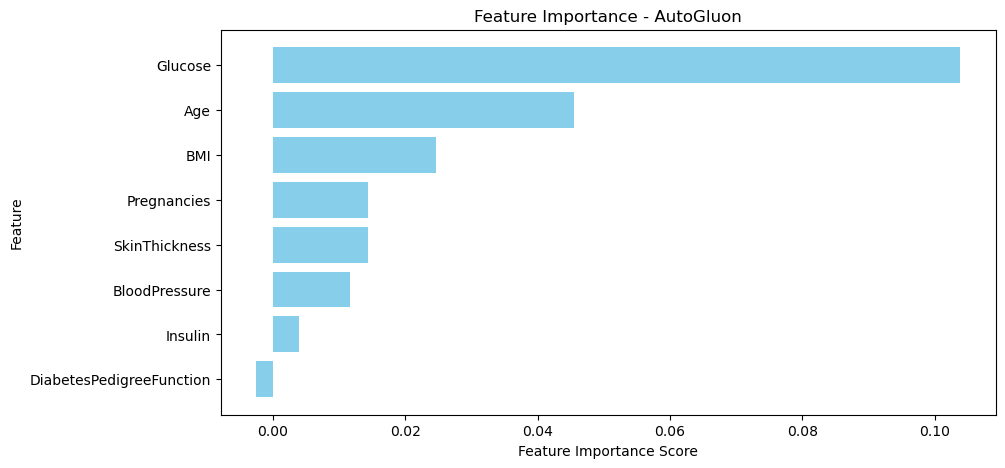

In [17]:
# Berechne die Feature Importance
feature_importance = predictor.feature_importance(data=test_data)

# Zeige die Feature Importance als Tabelle
import pandas as pd
import matplotlib.pyplot as plt

# Sortiere nach Wichtigkeit
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# Ausgabe der Tabelle
print(feature_importance)

# 📊 Visualisierung der Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance.index, feature_importance["importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - AutoGluon")
plt.gca().invert_yaxis()
plt.show()

### Use the Autogluon library
Use the library autogluon for automated hyperparametertuning and model benchmarking. The fit function of the TabularPredictor object allows for setting the option: <br>
<i>presets = {‘best_quality’, ‘high_quality’, ‘good_quality’, ‘medium_quality’, ‘experimental_quality’, ‘optimize_for_deployment’, ‘interpretable’, ‘ignore_text’}</i> <br>

medium_quality can limit the depths of hyperparameter optimization..

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# 📌 Lade den Diabetes-Datensatz
file_path = "../data/df_imputed_clean.csv"  # Pfad anpassen
df = pd.read_csv(file_path)

# 📌 Definiere die Zielvariable
label = "Outcome"  # Annahme: Die Spalte "Outcome" enthält die Zielvariable (Diabetes Ja/Nein)

# 📌 Splitte die Daten in Trainings- und Testset (80% Training, 20% Test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df[label])


# 📌 Trainiere AutoGluon-Predictor mit Hyperparameter-Tuning
predictor = TabularPredictor(label=label, path="autogluon_models").fit(
    train_data,
    presets="medium_quality",  # Schnellere Optimierung mit begrenztem Hyperparameter-Tuning
    time_limit=600,  # Maximale Trainingszeit in Sekunden (z. B. 10 Minuten)
    verbosity=2  # Zeigt detaillierte Logs zum Training
)

# 📌 Zeige das Leaderboard mit den besten Modellen
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# 📌 Mache Vorhersagen auf den Testdaten
y_pred = predictor.predict(test_data.drop(columns=[label]))  # Entferne die Zielvariable für Vorhersagen
print("📌 Beispielhafte Vorhersagen:\n", y_pred.head())

# 📌 Berechne Modellgenauigkeit
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data[label], y_pred)
print(f"📌 Modellgenauigkeit auf Testdaten: {accuracy:.4f}")


/Applications/anaconda3/envs/aa_tuesday/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          12
Memory Avail:       13.08 GB / 24.00 GB (54.5%)
Disk Space Avail:   267.22 GB / 460.43 GB (58.0%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/Users/davidsuss/Documents/GitHub/Applied-Analytics/04_Thursday/autogluon_models"
Train Data Rows:    583
Train Data Columns: 12
Label Column:       Outcome
AutoGluon infers yo

                  model  score_test  score_val eval_metric  pred_time_test  \
0        ExtraTreesGini    0.801370   0.726496    accuracy        0.030316   
1         LightGBMLarge    0.794521   0.811966    accuracy        0.002562   
2   WeightedEnsemble_L2    0.794521   0.811966    accuracy        0.003201   
3      RandomForestEntr    0.794521   0.760684    accuracy        0.026539   
4      RandomForestGini    0.794521   0.760684    accuracy        0.027869   
5        ExtraTreesEntr    0.794521   0.717949    accuracy        0.031047   
6              CatBoost    0.767123   0.769231    accuracy        0.001172   
7            LightGBMXT    0.767123   0.786325    accuracy        0.001666   
8               XGBoost    0.767123   0.803419    accuracy        0.003811   
9              LightGBM    0.732877   0.794872    accuracy        0.000974   
10       KNeighborsUnif    0.636986   0.717949    accuracy        0.014523   
11       KNeighborsDist    0.630137   0.735043    accuracy      

### Show the leaderboard
TabularPredictor objects from Autogluon provide a function "leaderboard"

### Show the feature importance table
The TabularPredictor class from Autogluon also provides a function "feature_importance"

These features in provided data are not utilized by the predictor and will be ignored: ['Multivariate_Outlier']
Computing feature importance via permutation shuffling for 11 features using 146 rows with 5 shuffle sets...
	0.39s	= Expected runtime (0.08s per shuffle set)
	0.07s	= Actual runtime (Completed 5 of 5 shuffle sets)


                            importance    stddev   p_value  n  p99_high  \
Mahalanobis_Distance      1.191781e-01  0.015006  0.000030  5  0.150076   
Glucose                   6.986301e-02  0.017729  0.000458  5  0.106367   
Insulin                   5.479452e-02  0.022194  0.002628  5  0.100493   
BMI                       4.657534e-02  0.018379  0.002391  5  0.084417   
Age                       2.054795e-02  0.022717  0.056581  5  0.067322   
DiabetesPedigreeFunction  2.739726e-03  0.010388  0.293525  5  0.024128   
Outlier                   0.000000e+00  0.000000  0.500000  5  0.000000   
SkinThickness            -2.220446e-17  0.018758  0.500000  5  0.038622   
Unnamed: 0               -2.739726e-03  0.007809  0.761690  5  0.013340   
BloodPressure            -2.739726e-03  0.011461  0.689346  5  0.020859   
Pregnancies              -4.109589e-03  0.010388  0.786841  5  0.017278   

                           p99_low  
Mahalanobis_Distance      0.088280  
Glucose                  

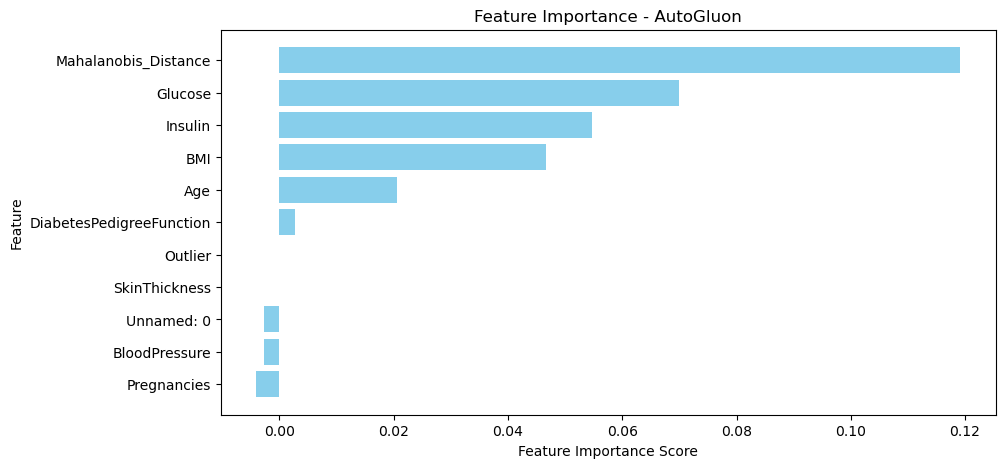

In [13]:
# Berechne die Feature Importance
feature_importance = predictor.feature_importance(data=test_data)

# Zeige die Feature Importance als Tabelle
import pandas as pd
import matplotlib.pyplot as plt

# Sortiere nach Wichtigkeit
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# Ausgabe der Tabelle
print(feature_importance)

# 📊 Visualisierung der Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance.index, feature_importance["importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - AutoGluon")
plt.gca().invert_yaxis()
plt.show()
